<a href="https://colab.research.google.com/github/Jaime44/Sistemas-Cognitivos-A.-/blob/main/Actividad%201%20-%20Lab%20Conceptos%20generales%20de%20las%20ANN/Actividad_1_Redes_Neuronales_Artificiales_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

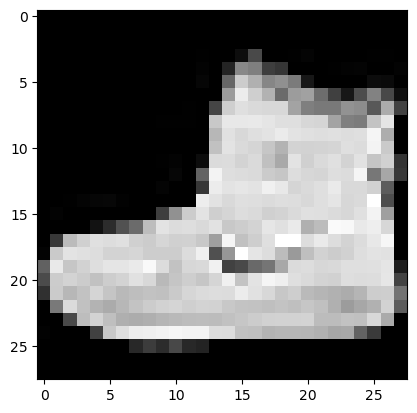

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
### Tu código aquí ###
info_img_train = training_images.shape
print(f"Para el conjunto de datos de entrenamiento hay {info_img_train[0]} imagenes de {info_img_train[1]}x{info_img_train[2]}")
info_img_test = test_images.shape
print(f"Para el conjunto de datos de entrenamiento hay {info_img_test[0]} imagenes de {info_img_test[1]}x{info_img_test[2]}")

Para el conjunto de datos de entrenamiento hay 60000 imagenes de 28x28
Para el conjunto de datos de entrenamiento hay 10000 imagenes de 28x28


*Tu respuesta aquí*

Para el conjunto de datos de entrenamiento hay 60000 imagenes de 28x28.

Para el conjunto de datos de entrenamiento hay 10000 imagenes de 28x28.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [7]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
### Tu código aquí ###
training_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [9]:
training_images[0][0][0]

0.0

*Tu respuesta aquí*

Un example del dataset consiste en una imagen y su etiqueta correspondiente. Por ejemplo, "training_images[0]" sería la primera imagen del conjunto de datos de entrenamiento y training_label [0] sería la etiqueta asociada a esa imagen.

training_images[0][0][0]--> sería el primer pixel de la primera imagen de esta forma se podría acceder a los pixeles individuales de cada imagen que están en escala de grises y normalizados.

La variable y hace referencia a training_labels. Contiene las etiquetas (clases) a las que pertenecen las imágenes del conjunto de entrenamiento. Es una lista de números enteros donde cada número representa la clase de la prenda de vestir correspondiente a la imagen en training_images.


## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [10]:
### Tu código para la red neuronal de la pregunta 2 aquí ###
model = Sequential()
model.add(Flatten(input_shape=[28,28])) #Convertir la imagen a vector. 
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

: 

In [ ]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
result = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [ ]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
model.evaluate(test_images,test_labels)

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos:

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones.

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números,
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [ ]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model.predict(test_images)



In [ ]:
print(classifications[0])
print(test_labels[0])

Tu respuesta a la pregunta 3.1 aquí:

La primera entrada es un vector de porcentajes, en concreto 10 valores que suman uno. Estos 10 valores corresponden a las 10 clases de nuestro conjunto de dataset. Cada valor es la probabilidad que se ha obtenido de que la imagen pertenezca a esa clase.
Este vector o matriz con tantos vectores como imágenes hay en el set de test se obtiene gracias a la función de salida softmax. Esta función normaliza los resultados de tal amanera que tenemos una salida por cada clase y con su correspondiente porcentaje de pertenecer a esa clase.


Tu respuesta a la pregunta 3.2 aquí:

Pertenece a la clase última, 10 (Ankle boot), con un porcentaje de  8.7047446e-01 ~= 87%.

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
### Tu código para 512 neuronas aquí ###
model_500n = Sequential()
model_500n.add(Flatten(input_shape=[28,28]))
model_500n.add(Dense(512, activation='sigmoid'))
model_500n.add(Dense(10, activation='softmax'))
model_500n.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
result_500n = model_500n.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
model_500n.evaluate(test_images,test_labels)

In [ ]:
### Tu código para 1024 neuronas aquí ###
model_1024n = Sequential()
model_1024n.add(Flatten(input_shape=[28,28]))
model_1024n.add(Dense(1024, activation='sigmoid'))
model_1024n.add(Dense(10, activation='softmax'))
model_1024n.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
result_1024n = model_1024n.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
model_1024n.evaluate(test_images,test_labels)

**pregunta 4.1 (0.5 puntos)**:

¿Cuál es el impacto que tiene la red neuronal? Tu respuesta a la pregunta 4.1 aquí: En el accuracy de entrenamiento de estos dos últimos modelos se llega a un porcentaje de más del 90%, con respecto a la perdida en el modelo de 500 neuronas hay una ligera mejora y se reduce un poco más la perdida, pero en el caso de 1024 neuronas no hay mucha diferencia con respecto a la red de 128 neuronas o 500. Por último, el impacto en la métrica de precisión en la validación hay una ligera mejora en la red de 500 neuronas con respecto a la de 128 y una muy ligera mejora en la 1024 pero es de un orden muy bajo en el accuracy. No ha mejorado la precisión en comparación o aumento del número de neuronas de echo mejora el accuracy de entrenamiento, pero no tanto el de validación, estoy puede tender al overfiting.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**:

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**:

* ¿Porque crees que ha ocurrido esto?

In [ ]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications_500n = model_500n.predict(test_images)
print(f'Classifications to model with 500 neurons: {classifications_500n[0]}')

classifications_1024n = model_1024n.predict(test_images)
print(f'Classifications to model with 1024 neurons: {classifications_1024n[0]}')

Tu respuesta a la pregunta 4.2 aquí:

Predice con aun más porcentaje que la primera prenda sigue siendo la etiquetada con el número 10, Ankle boot. El porcentaje es del 98%

Tu respuesta a la pregunta 4.3 aquí:

Porque hay una ligera mejora en la obtención del entrenamiento con más neuronas.

# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [ ]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
model_without_flatten = Sequential()
model_without_flatten.add(Dense(128, activation='sigmoid'))
model_without_flatten.add(Dense(10, activation='softmax'))
model_without_flatten.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
# result_without_flatten = model_without_flatten.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Tu respuesta a la pregunta 5 aquí:

El error que da es porque espera un tensor de 1D y las imágenes son de 28x28. Espera imágenes de una dimensión porque se ha quitado la capa Flatten para indicarle a la red cual va a ser la entrada en la red en función del conjunto de datos.

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model_5_out = Sequential()
model_5_out.add(Flatten(input_shape=[28,28]))
model_5_out.add(Dense(128, activation='sigmoid'))
model_5_out.add(Dense(5, activation='softmax'))
model_5_out.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model_5_out.summary()

In [ ]:
# result_5_out = model_5_out.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

In [ ]:
# model_5_out.evaluate(test_images,test_labels)

In [ ]:
# classifications = model_5_out.predict(test_images)
# print(classifications[0])

Tu respuestas a la pregunta 6.1 aquí:

Para obtener una salida por cada clase del conjunto de datos.

Tu respuestas a la pregunta 6.2 aquí:

La red estaría intentando clasificar las imágenes en solo 5 clases en lugar de las 10 clases originales. Esto crearía un problema de clasificación diferente, donde la red intentaría agrupar las prendas de vestir en solo 5 categorías en lugar de distinguir entre las 10 clases detalladas en Fashion MNIS.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###
result_15_epochs = model.fit(training_images, training_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

In [ ]:
### Tu código para 30 epoch aquí ###
result_30_epochs = model.fit(training_images, training_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels))

Tu respuesta a la pregunta 7.3 aquí:

Al aumentar el número de epochs a 30, el modelo podría comenzar a memorizar los datos de entrenamiento en lugar de generalizarlos. Esto puede llevar a un sobreajuste, donde el modelo se vuelve demasiado específico para los datos de entrenamiento y no puede generalizar bien a nuevos datos. Este fenómeno se llama sobreajuste (overfitting).

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        # if(logs.get('accuracy')> 0.85):
        #       print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
        #       self.model.stop_training = True
        if(logs.get('loss') <= 0.4):
          print("\nAlcanzado el 40% de loss, se cancela el entrenamiento!!")
          self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
### Tu código para la red neuronal de la pregunta 2 aquí ###
model_sigmoid = Sequential()
model_sigmoid.add(Flatten(input_shape=[28,28]))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))
model_sigmoid.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model_sigmoid.summary()


In [ ]:
model_relu = Sequential()
model_relu.add(Flatten(input_shape=[28,28]))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))
model_relu.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model_relu.summary()


In [ ]:
result_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

In [ ]:
model_sigmoid.evaluate(test_images,test_labels)

In [ ]:
result_relu = model_relu.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

In [ ]:
model_relu.evaluate(test_images,test_labels)

In [ ]:
pd.DataFrame(result_sigmoid.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
pd.DataFrame(result_relu.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

ReLu tiende a converger más rápido que sigmoid, se puede observar en las gráficas de arriba, en la perdida empieza con menos perdida y desciende más rápido y llega a mejor perdida que con sigmoid. En términos de precisión hay una ligera mejora en la precisión del modelo con la función ReLU.
La función ReLU es menos propensa a neuronas muertas que la sigmoid. La sigmoid es más usada para problemas de clasificación binario en el rango de 0-1.


## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
model_params_zeros = Sequential()
model_params_zeros.add(Flatten(input_shape=[28,28]))
model_params_zeros.add(Dense(128, activation='relu', kernel_initializer='zeros', bias_initializer='zeros'))
model_params_zeros.add(Dense(128, activation='relu', kernel_initializer='zeros', bias_initializer='zeros'))
model_params_zeros.add(Dense(128, activation='relu', kernel_initializer='zeros', bias_initializer='zeros'))
model_params_zeros.add(Dense(10, activation='softmax'))
model_params_zeros.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
# model_params_zeros.summary()


In [ ]:
model_params_random = Sequential()
model_params_random.add(Flatten(input_shape=[28,28]))
model_params_random.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_params_random.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_params_random.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_params_random.add(Dense(10, activation='softmax'))
model_params_random.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
# model_params_random.summary()

In [ ]:
initializer = keras.initializers.GlorotUniform()
values = initializer(shape=(2, 2))

In [ ]:
model_params_glorot = Sequential()
model_params_glorot.add(Flatten(input_shape=[28,28]))
model_params_glorot.add(Dense(128, activation='relu', kernel_initializer=initializer, bias_initializer=initializer))
model_params_glorot.add(Dense(128, activation='relu', kernel_initializer=initializer, bias_initializer=initializer))
model_params_glorot.add(Dense(128, activation='relu', kernel_initializer=initializer, bias_initializer=initializer))
model_params_glorot.add(Dense(10, activation='softmax'))
model_params_glorot.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
# model_params_glorot.summary()

In [ ]:
result_params_zeros = model_params_zeros.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
model_params_zeros.evaluate(test_images,test_labels)

In [ ]:
result_params_randoms = model_params_random.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
model_params_random.evaluate(test_images,test_labels)

In [ ]:
result_params_glorot = model_params_glorot.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
model_params_glorot.evaluate(test_images,test_labels)

In [ ]:
classifications = model_params_zeros.predict(test_images)
print(classifications[0])

In [ ]:
classifications = model_params_random.predict(test_images)
print(classifications[0])

In [ ]:
classifications = model_params_glorot.predict(test_images)
print(classifications[0])

Respuesta pregunta 10:

En la inicialización con ceros la pérdida y la precisión no mejora durante el entrenamiento. Al inicializar todos los pesos y sesgos a cero provoca que todas las neuronas en las mismas capas se comporten de la misma manera. Eso provoca que la red actúe como si solo tuviera una sola neurona en cada capa y por consiguiente no aprende.

En la inicialización aleatorio con una distribución normal la red pudo aprender y mejorar su rendimiento en el conjunto de prueba. Esta inicialización facilita el aprendizaje de la red. Con esta aleatoriedad la red es capaz de aprender más patrones.

La última inicialización no se obtiene mejoras sustanciales con respecto a la inicialización aleatoria.



## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# Adam
opt_adam = tf.keras.optimizers.Adam()

model_adam = Sequential()
model_adam.add(Flatten(input_shape=[28,28]))
model_adam.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_adam.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_adam.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_adam.add(Dense(10, activation='softmax'))
model_adam.compile(loss="sparse_categorical_crossentropy", optimizer=opt_adam, metrics=["accuracy"])


In [ ]:
# AdaGrad
opt_adagrad = keras.optimizers.Adagrad()

model_adagrad = Sequential()
model_adagrad.add(Flatten(input_shape=[28,28]))
model_adagrad.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_adagrad.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_adagrad.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_adagrad.add(Dense(10, activation='softmax'))
model_adagrad.compile(loss="sparse_categorical_crossentropy", optimizer=opt_adagrad, metrics=["accuracy"])

In [ ]:
# RMSProp
opt_rmsprop = tf.keras.optimizers.RMSprop()

model_rmsprop = Sequential()
model_rmsprop.add(Flatten(input_shape=[28,28]))
model_rmsprop.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_rmsprop.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_rmsprop.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_rmsprop.add(Dense(10, activation='softmax'))
model_rmsprop.compile(loss="sparse_categorical_crossentropy", optimizer=opt_rmsprop, metrics=["accuracy"])

In [ ]:
# SGD
opt_sgd = tf.keras.optimizers.SGD()

model_sgd = Sequential()
model_sgd.add(Flatten(input_shape=[28,28]))
model_sgd.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_sgd.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_sgd.add(Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_sgd.add(Dense(10, activation='softmax'))
model_sgd.compile(loss="sparse_categorical_crossentropy", optimizer=opt_sgd, metrics=["accuracy"])

In [ ]:
result_adam = model_adam.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
print(f'ADAM Evaluate: {model_adam.evaluate(test_images,test_labels)}')
classifications_adam = model_adam.predict(test_images)
print(f'ADAM Classifications: {classifications_adam[0]}\n')

result_adagrad = model_adagrad.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
print(f'AdaGrad Evaluate: {model_adagrad.evaluate(test_images,test_labels)}')
classifications_adagrad = model_adagrad.predict(test_images)
print(f'AdaGrad Classifications: {classifications_adagrad[0]}\n')

result_rmsprop = model_rmsprop.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
print(f'RMSProp Evaluate: {model_rmsprop.evaluate(test_images,test_labels)}')
classifications_rmsprop = model_rmsprop.predict(test_images)
print(f'RMSProp Classifications: {classifications_rmsprop[0]}\n')

result_sgd = model_sgd.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
print(f'SGD Evaluate: {model_sgd.evaluate(test_images,test_labels)}')
classifications_sgd = model_sgd.predict(test_images)
print(f'SGD Classifications: {classifications_sgd[0]}\n')



Respuesta al ejercicico 11:

Para el optimizador Adam se ha obtenido un 87,76% de precisión en la validación, es el mejor resultado junto con el optimizador RMSProp. En este caso, ha mostrado un buen rendimiento y una convergencia rápida en comparación con otros optimizadores.
Para el optimizador AdaGrad el resultado es el peor de todos en comparación con una precisión de 70,9%. AdaGrad puede converger demasiado rápido para problemas complejos, lo que puede llevar a soluciones subóptimas.
RMSProp maneja mejor el problema de AdaGrad de converger demasiado rápido, en este caso se ha observado una convergencia más estable. Por último, SGD ajusta los pesos en función del gradiente calculado en cada lote de datos.  Aunque SGD es simple, puede ser difícil de entrenar y puede llevar más tiempo converger en comparación con optimizadores adaptativos como Adam y RMSProp.


## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

In [ ]:
from tensorflow.keras.regularizers import l2

# Carga del conjunto de datos Fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


training_images = training_images/255.0
test_images = test_images/255.0

# Limitar el número de muestras para acelerar el entrenamiento
# samples = 900000
# training_images = training_images[:samples]/255.0
# test_images = test_images[:samples]/255.0

# training_labels = training_labels[:samples]
# test_labels =test_labels[:samples]

# Construcción del modelo de la red neuronal
model_final = Sequential()
model_final.add(Flatten(input_shape=[28, 28]))  # Capa de entrada: aplanar las imágenes 28x28
model_final.add(Dense(256, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_final.add(BatchNormalization())  # Capa de normalización para estabilizar el aprendizaje
model_final.add(Dropout(0.2))  # Dropout para prevenir el sobreajuste
model_final.add(Dense(256, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_final.add(BatchNormalization())
model_final.add(Dropout(0.2))
model_final.add(Dense(256, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'))
model_final.add(BatchNormalization())
model_final.add(Dropout(0.2))
model_final.add(Dense(10, activation='softmax'))  # Capa de salida: 10 clases para las categorías de moda

# Compilación del modelo con sparse_categorical_crossentropy como función de pérdida
model_final.compile(optimizer=keras.optimizers.Adam(),
                    loss='sparse_categorical_crossentropy',  # Usar sparse_categorical_crossentropy aquí
                    metrics=['accuracy'])

# Configuración de EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entrenamiento del modelo
history = model_final.fit(training_images, training_labels,
                         epochs=50,
                         batch_size=64,
                         validation_data=(test_images, test_labels),
                         callbacks=[early_stopping])

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model_final.evaluate(test_images, test_labels)

# Impresión de la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')


No se ha podido conseguir un modelo con el que obtener una precesión de 90% o más. En elcódigo se explica que se hace encada aprte del código. En general: Se divide el conjunto de datos para obtener unas muestras y hacer el entrenamiento mas raido y poder agilizar el proceso de busqueda de párametros.
La función de perdida elegida ha sido Adam que es la que mejores resultados a dado y como función de salida la softmax por razones explicadas anteriormente.
Se ha realizado un rpoceso de pruebas de hiperparametros para encontrar el mejor rt de la función de perdidad que finalamente se decide dejar el de por defecto 0.001. Los mejores valores de Dropout son por debajo de 0.5. Tampoco se han obtenido buenos resultados aumentendo el número de capas, tampoco el bach. No ha hecho falta poner más de 50 epocas porque para antes de tiempo devido a la fucnión EarlyStopping.
El mejor número de neuronas es de 256 en cada capa.     

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()